# Smoothing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Generate an artifical (and noisy) signal

In [3]:
np.random.seed(42)
noise = np.random.normal(0,1.5,365*5)

In [4]:
x = np.linspace(0,5,5*365)

In [5]:
y = 2*x + np.sin(2*np.pi*x/(1/2)) + noise

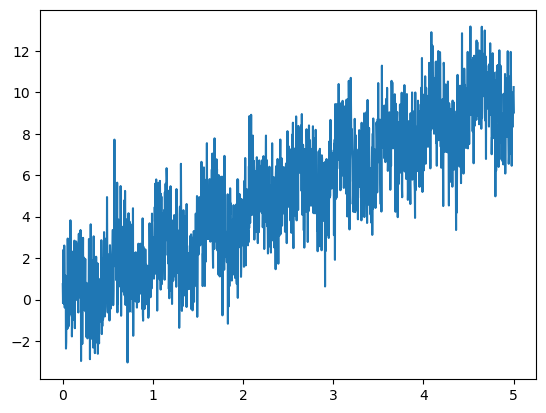

In [6]:
plt.plot(x,y)

We'll turn it into a simple Pandas dataframe to use some convenient methods.

In [7]:
d = pd.DataFrame({'time':x, 'y':y})

In [8]:
d

,time,y
0,0.000000,0.745071
1,0.002741,-0.167474
2,0.005482,1.051338
3,0.008224,2.404150
4,0.010965,-0.191947
...,...,...
1820,4.989035,9.643831
1821,4.991776,9.995672
1822,4.994518,9.582911
1823,4.997259,8.985073


In [9]:
d.set_index('time', inplace=True)

In [10]:
d

,y
time,
0.000000,0.745071
0.002741,-0.167474
0.005482,1.051338
0.008224,2.404150
0.010965,-0.191947
...,...
4.989035,9.643831
4.991776,9.995672
4.994518,9.582911


`rolling` allows us to do aggregation over a moving window.

In [11]:
d.rolling(7)

Rolling [window=7,center=False,axis=0,method=single]

<AxesSubplot:xlabel='time'>

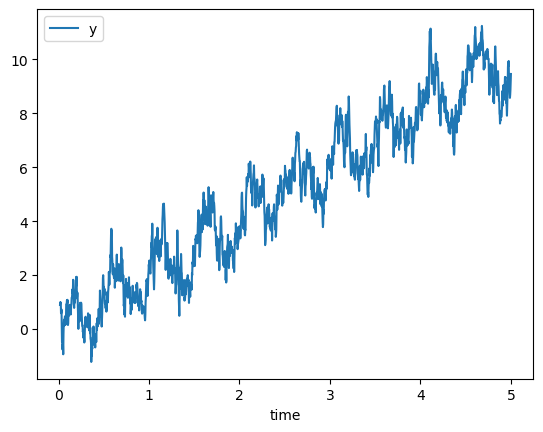

In [12]:
d.rolling(7).mean().plot()

<AxesSubplot:xlabel='time'>

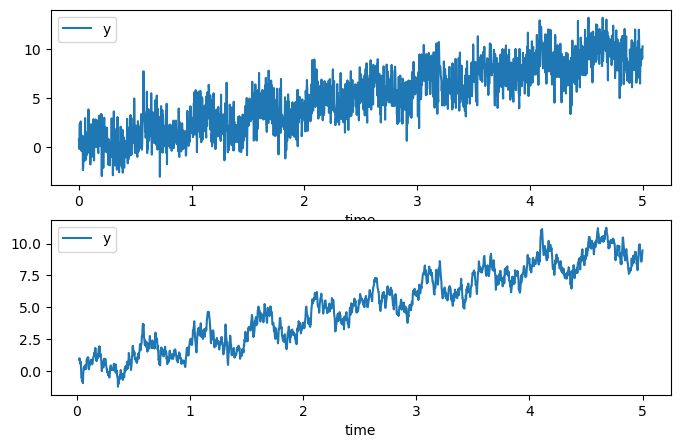

In [13]:
fig,ax=plt.subplots(2,1,figsize=(8,5))
d.plot(ax=ax[0])
d.rolling(7).mean().plot(ax=ax[1])

<AxesSubplot:xlabel='time'>

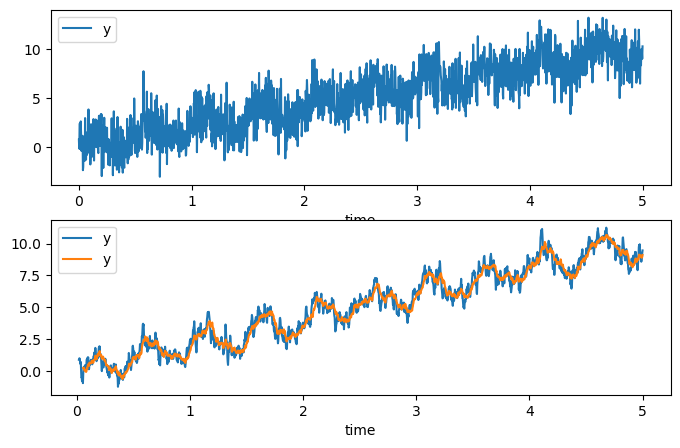

In [14]:
fig,ax=plt.subplots(2,1,figsize=(8,5))
d.plot(ax=ax[0])
d.rolling(7).mean().plot(ax=ax[1])
d.rolling(21).mean().plot(ax=ax[1])

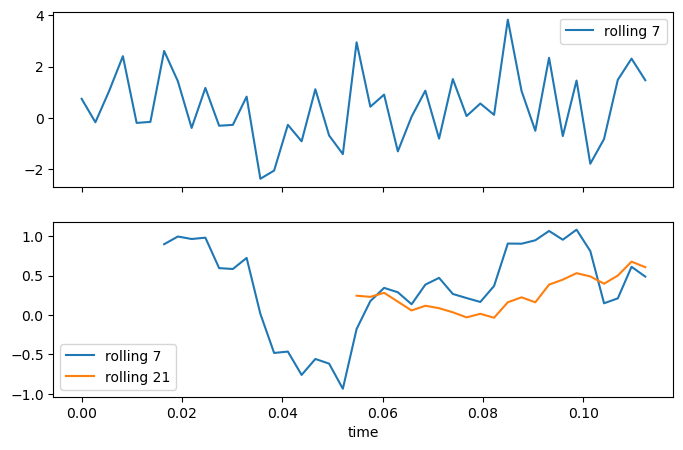

In [15]:
fig,ax=plt.subplots(2,1,figsize=(8,5),sharex=True)
d.iloc[0:42].plot(ax=ax[0])
d.iloc[0:42].rolling(7).mean().plot(ax=ax[1])
d.iloc[0:42].rolling(21).mean().plot(ax=ax[1])
ax[0].legend(['rolling 7'])
ax[1].legend(['rolling 7','rolling 21'])

Other smoothing techniques:
* LOWESS : https://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html
* SciPy's UnivariateSpline : 

In [16]:
d

,y
time,
0.000000,0.745071
0.002741,-0.167474
0.005482,1.051338
0.008224,2.404150
0.010965,-0.191947
...,...
4.989035,9.643831
4.991776,9.995672
4.994518,9.582911


In [17]:
d.index

Float64Index([                  0.0, 0.0027412280701754384,
               0.005482456140350877,  0.008223684210526315,
               0.010964912280701754,  0.013706140350877192,
                0.01644736842105263,  0.019188596491228067,
               0.021929824561403508,  0.024671052631578948,
              ...
                   4.97532894736842,     4.978070175438596,
                  4.980811403508771,     4.983552631578947,
                  4.986293859649122,     4.989035087719298,
                 4.9917763157894735,     4.994517543859649,
                 4.9972587719298245,                   5.0],
             dtype='float64', name='time', length=1825)

## LOWESS

In [18]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess

In [19]:
z = lowess(y,x)

z here will be two-dimensional, containing the sorted x and the lowess y.

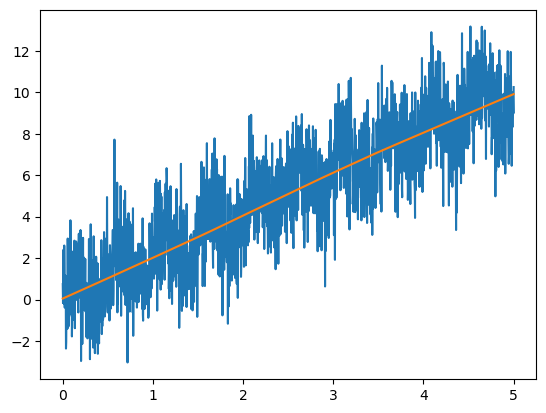

In [20]:
plt.plot(x,y)
plt.plot(z[:,0],z[:,1])

You can specify the fraction of points over which to do the LOWESS in the method call.

In [21]:
z = lowess(y,x,frac=0.01)

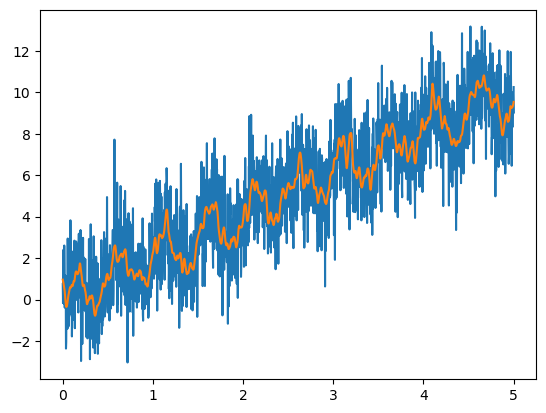

In [22]:
plt.plot(x,y)
plt.plot(z[:,0],z[:,1])

## Splines

In [23]:
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import BSpline

In [24]:
spl = UnivariateSpline(x, y)

This is a spline object which will give other values of y for any x that you pass into it.

In [25]:
spl

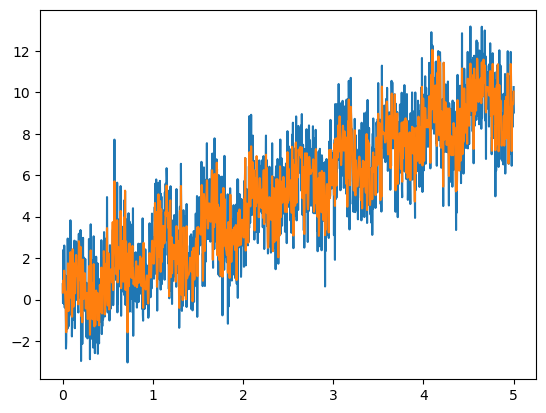

In [26]:
plt.plot(x,y)
plt.plot(x,spl(x))

Splines are commonly used for interpolation (as indeed you can see from the import statement).  Let's make a more sparse set of data.

In [27]:
np.random.seed(42)
noise = np.random.normal(0,1.5,50)

x = np.linspace(0, 10, 50)
y = 4 + 2*x - x**2 + 0.075*x**3 + noise
ytrue = 4 + 2*x - x**2 + 0.075*x**3

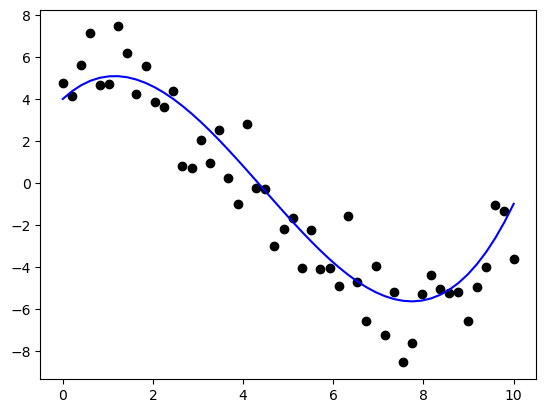

In [30]:
plt.plot(x,y,'ko')
plt.plot(x,ytrue,'b')

In [31]:
spl = UnivariateSpline(x, y)

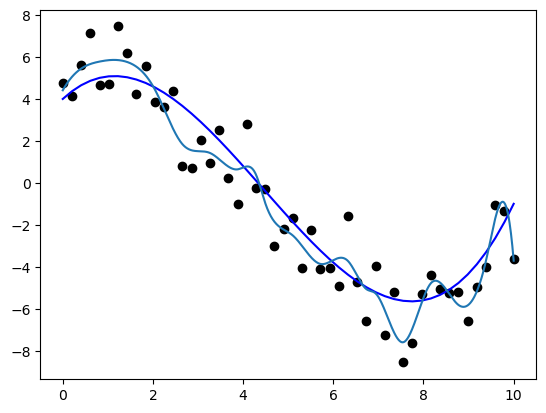

In [32]:
plt.plot(x,y,'ko')
plt.plot(x,ytrue,'b')
xnew = np.linspace(0, 10, 1000)
plt.plot(xnew,spl(xnew))

In [33]:
spl.set_smoothing_factor(100)

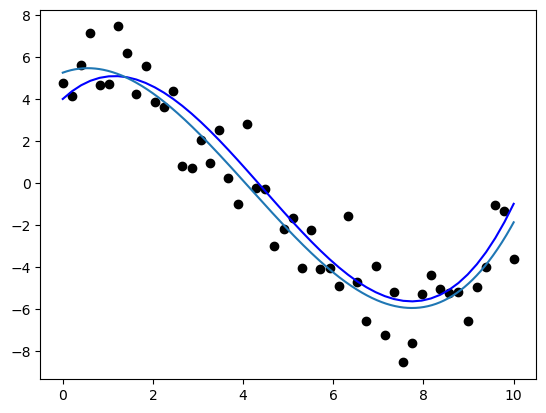

In [34]:
plt.plot(x,y,'ko')
plt.plot(x,ytrue,'b')
xnew = np.linspace(0, 10, 1000)
plt.plot(xnew,spl(xnew))

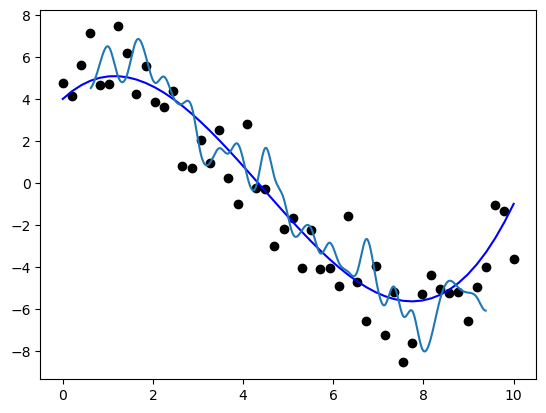

In [35]:
spl = BSpline(x,y,3,False)
# the 4 here is the order of the spline
# the False specifies whether the spline should be extrapolated up to the edge

plt.plot(x,y,'ko')
plt.plot(x,ytrue,'b')
xnew = np.linspace(0, 10, 1000)
plt.plot(xnew,spl(xnew))

For good measure, let's also compare the LOWESS on this data.

In [36]:
z = lowess(y,x)
#z = lowess(y,x,0.2)

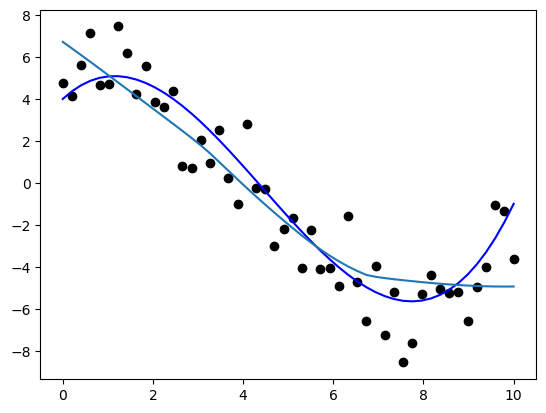

In [37]:
plt.plot(x,y,'ko')
plt.plot(x,ytrue,'b')
plt.plot(z[:,0], z[:,1])

## Polynomial fit

In [38]:
z = np.polyfit(x, y, 3)

In [39]:
z

array([ 0.06154017, -0.7659791 ,  0.79232879,  5.25347854])

From before:
$ytrue = 4 + 2*x - x**2 + 0.075*x**3$

The coefficients are written from high order to low order.

In [40]:
z[0]

0.061540174460311584

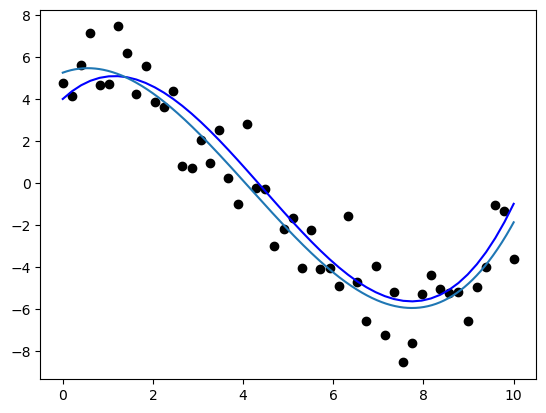

In [41]:
plt.plot(x,y,'ko')
plt.plot(x,ytrue,'b')
xnew = np.linspace(0, 10, 1000)
plt.plot(xnew, z[3] + z[2]*xnew + z[1]*xnew**2 + z[0]*xnew**3)

The advantage here?
-> we get an equation with known coefficients -> much more interpretable than simply having a smooth curve